# helper function

In [89]:
import pandas as pd

def plot_history(history_n):
    pd.DataFrame(history_n.history).plot(figsize=(8,8))

In [90]:
import tensorflow as tf

# load MNIST data

In [91]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# visualise data

<Figure size 432x288 with 0 Axes>

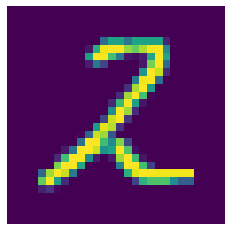

<Figure size 432x288 with 0 Axes>

In [92]:
from matplotlib import pyplot as plt
import random

random_number = random.randint(0, len(x_train))
plt.imshow(x_train[random_number])
plt.axis(False)
plt.figure()

# preprocessing

In [93]:
import numpy as np
NUM_CLASSES=10
INPUT_SHAPE = (28,28,1)
BATCH_SIZE = 128

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_test = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
y_train = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)

In [94]:
x_train.shape

(60000, 28, 28, 1)

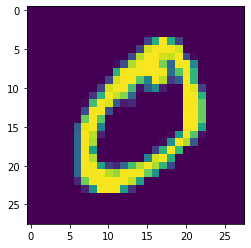

In [95]:
plt.imshow(x_train[1])

# data augmentation

In [96]:
with tf.device('/cpu:0'):
    from tensorflow.keras import layers
    augmentation = tf.keras.Sequential([
        layers.RandomZoom(0.2),
        layers.RandomRotation(0.2),
        layers.RandomTranslation(height_factor=(0.1), width_factor=(0.1))
    ])

    x_train_aug = augmentation(x_train)

In [97]:
y_train.shape

(60000, 10)

In [98]:
x_train = np.append(x_train_aug, x_train).reshape(-1, 28,28,1)
y_train = np.append(y_train, y_train).reshape(-1, 10)

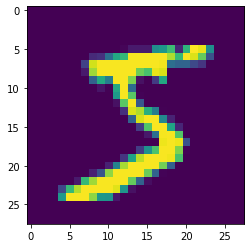

In [99]:
plt.imshow(x_train[0])

# model 1 baseline

In [100]:
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=INPUT_SHAPE),
    tf.keras.layers.Conv2D(10,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 conv2d_29 (Conv2D)          (None, 22, 22, 10)        910       
                                                                 
 flatten_9 (Flatten)         (None, 4840)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                48410     
                                                                 
Total params: 50,330
Trainable params: 50,330
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_1.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs=5, batch_size = BATCH_SIZE,
                        steps_per_epoch = len(x_train)/BATCH_SIZE,
                        validation_data = (x_test, y_test),
                        validation_steps = len(x_test)/BATCH_SIZE)

Epoch 1/5
937/937 [==============================] - 14s 14ms/step - loss: 0.1624 - accuracy: 0.9528 - val_loss: 0.0626 - val_accuracy: 0.9796
Epoch 2/5
937/937 [==============================] - 13s 14ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 3/5
937/937 [==============================] - 13s 14ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 4/5
937/937 [==============================] - 12s 13ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0487 - val_accuracy: 0.9861
Epoch 5/5
937/937 [==============================] - 12s 13ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0526 - val_accuracy: 0.9856


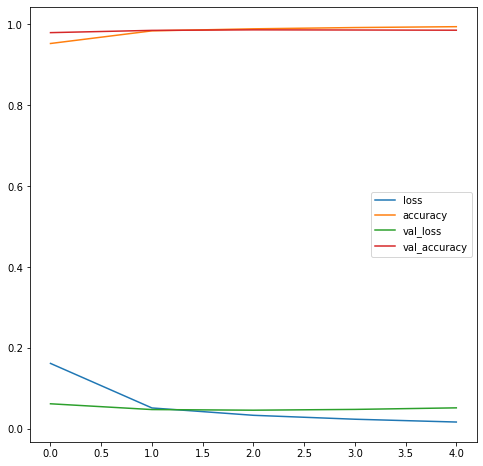

In [102]:
plot_history(history_1)

# model 2

In [103]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=INPUT_SHAPE),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(10,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [104]:
model_2.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size = BATCH_SIZE,
                        steps_per_epoch = len(x_train)/BATCH_SIZE,
                        validation_data = (x_test, y_test),
                        validation_steps = len(x_test)/BATCH_SIZE)

Epoch 1/10
937/937 [==============================] - 16s 17ms/step - loss: 0.2047 - accuracy: 0.9368 - val_loss: 0.0891 - val_accuracy: 0.9786
Epoch 2/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 3/10
937/937 [==============================] - 15s 16ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0542 - val_accuracy: 0.9867
Epoch 4/10
937/937 [==============================] - 15s 16ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0446 - val_accuracy: 0.9871
Epoch 5/10
937/937 [==============================] - 16s 17ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0539 - val_accuracy: 0.9849
Epoch 6/10
937/937 [==============================] - 15s 16ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0422 - val_accuracy: 0.9873
Epoch 7/10
937/937 [==============================] - 15s 16ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0416 - val_accuracy:

<AxesSubplot:>

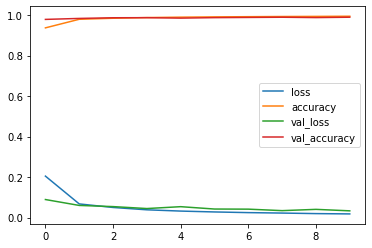

In [105]:
pd.DataFrame(history_2.history).plot()

# save and use model 2

In [106]:
model_2.save('handwriting model')

INFO:tensorflow:Assets written to: handwriting model/assets


INFO:tensorflow:Assets written to: handwriting model/assets
